In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

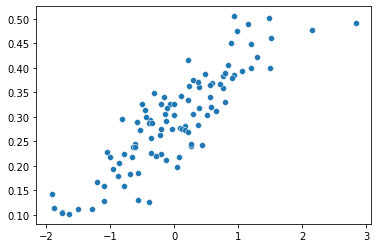

In [14]:
num_puntos = 100
conjunto_puntos = []
for i in range(num_puntos):
    x1 = np.random.normal(0.0, 0.9)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.05)
    conjunto_puntos.append([x1, y1])

x_data = [v[0] for v in conjunto_puntos]
y_data = [v[1] for v in conjunto_puntos]

sns.scatterplot(x=x_data, y=y_data)

In [15]:
W = tf.Variable(tf.random.uniform([1],-1,1))
b = tf.Variable(tf.zeros([1]))
X = tf.keras.Input([100], dtype="float")
y = W * X + b

X = tf.constant( x_data , dtype=tf.float32 )
Y = tf.constant( y_data , dtype=tf.float32 ) 

def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias


The following Variables were used a Lambda layer's call (tf.__operators__.add_6), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=(1,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [16]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [20]:
num_features = X.shape[0]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

InvalidArgumentError: ignored